In [1]:
import pandas as pd
# compare machine learning algorithms on the sonar classification dataset
from pandas import read_csv
from pycaret.classification import setup
from pycaret.classification import compare_models

In [2]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [3]:
dataset.shape

(6000, 8)

In [4]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop = True)
print('Data for mpdelling :'+str(data.shape))
print('Unseen data for predictions :'+str(data_unseen.shape))

Data for mpdelling :(5400, 8)
Unseen data for predictions :(600, 8)


In [5]:
from pycaret.regression import *

In [6]:
exp_reg101 = setup(data=data, target = 'Price',session_id=123)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


In [7]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,762.0118,2763999.1585,1612.2410,0.9729,0.0817,0.0607,0.9240
rf,Random Forest Regressor,760.6304,2929683.1860,1663.0148,0.9714,0.0818,0.0597,0.7810
lightgbm,Light Gradient Boosting Machine,752.6446,3056347.8515,1687.9907,0.9711,0.0773,0.0567,0.3160
gbr,Gradient Boosting Regressor,920.0795,3763128.6878,1900.8431,0.9633,0.1024,0.0770,0.2020
dt,Decision Tree Regressor,1003.1237,5305620.3379,2228.7271,0.9476,0.1083,0.0775,0.0310
ridge,Ridge Regression,2413.5705,14120492.8000,3726.1644,0.8621,0.6689,0.2875,0.0150
lasso,Lasso Regression,2412.1926,14246797.6000,3744.2305,0.8608,0.6767,0.2866,0.0420
lr,Linear Regression,2414.4965,14243849.3000,3744.2798,0.8607,0.6729,0.2872,0.8460
llar,Lasso Least Angle Regression,2355.6152,14272020.5153,3745.3095,0.8607,0.6391,0.2728,0.0140
br,Bayesian Ridge,2415.8031,14270771.8397,3746.9951,0.8606,0.6696,0.2873,0.0320


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [8]:
# AdaBoost Regressor
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4101.8809,23013830.0177,4797.2732,0.7473,0.4758,0.5470
1,4251.5693,29296751.6657,5412.6474,0.7755,0.4940,0.5702
2,4047.8474,22291660.1785,4721.4045,0.7955,0.5068,0.5871
3,4298.3867,23482783.6839,4845.9038,0.7409,0.5089,0.5960
4,3888.5584,24461807.7242,4945.8880,0.6949,0.4764,0.5461
5,4566.4889,29733914.8752,5452.8813,0.7462,0.5462,0.6598
6,4628.7271,27841092.1974,5276.4659,0.7384,0.5549,0.6676
7,4316.4317,25979752.0083,5097.0336,0.6715,0.5034,0.5858
8,3931.2163,21097072.3513,4593.1549,0.7928,0.4858,0.5513
9,4291.1097,24815566.0009,4981.5225,0.7637,0.5495,0.6592


In [9]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


In [10]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,625.1813,1051762.9578,1025.5550,0.9885,0.0715,0.0526
1,797.6185,5638866.1771,2374.6297,0.9568,0.0727,0.0537
2,829.4586,3328375.4390,1824.3836,0.9695,0.0860,0.0619
3,720.3923,1697211.3816,1302.7707,0.9813,0.0714,0.0554
4,645.6800,1799949.1196,1341.6218,0.9775,0.0745,0.0534
5,830.7176,6423604.0184,2534.4830,0.9452,0.0810,0.0567
6,799.9136,3353992.2636,1831.3908,0.9685,0.0793,0.0585
7,714.3607,1930222.6458,1389.3245,0.9756,0.0732,0.0556
8,784.7648,2211933.1546,1487.2569,0.9783,0.0766,0.0582
9,778.3590,3127561.3571,1768.4913,0.9702,0.0872,0.0609


In [11]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,859.1907,2456840.0599,1567.4310,0.9730,0.1016,0.0727
1,1122.9409,9852564.2047,3138.8795,0.9245,0.1102,0.0758
2,911.3452,2803662.6885,1674.4141,0.9743,0.0988,0.0729
3,1002.5575,3926739.3726,1981.6002,0.9567,0.1049,0.0772
4,1167.8154,9751516.1909,3122.7418,0.8784,0.1226,0.0876
5,1047.7778,7833770.7037,2798.8874,0.9331,0.1128,0.0791
6,1010.0816,3989282.4802,1997.3188,0.9625,0.1106,0.0803
7,846.8085,2182534.9007,1477.3405,0.9724,0.0933,0.0709
8,1001.8451,4904945.0821,2214.7111,0.9518,0.1053,0.0734
9,1060.8742,5354347.6956,2313.9463,0.9490,0.1230,0.0847


In [12]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2629.7158,16222922.0054,4027.7689,0.8219,0.2553,0.2244
1,2764.7250,25273189.9003,5027.2448,0.8063,0.2714,0.2357
2,2605.9909,16883405.3119,4108.9421,0.8451,0.2617,0.2352
3,2588.0395,14475338.1062,3804.6469,0.8403,0.2685,0.2271
4,2403.7173,13602075.2435,3688.0991,0.8303,0.2672,0.2223
5,2538.7416,20724600.2592,4552.4280,0.8231,0.2644,0.2260
6,2720.2195,19796302.1522,4449.3036,0.8140,0.2644,0.2280
7,2707.6016,17084596.1502,4133.3517,0.7839,0.2743,0.2475
8,2444.0262,16340453.5625,4042.3327,0.8395,0.2623,0.2199
9,2545.6132,19267454.7853,4389.4709,0.8165,0.2680,0.2247


In [13]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,793.3856,1716621.0637,1310.1989,0.9812,0.1080,0.0745
1,990.1703,7448985.3924,2729.2829,0.9429,0.1057,0.0740
2,905.1469,3415442.4385,1848.0916,0.9687,0.1106,0.0772
3,772.6203,1997386.2267,1413.2892,0.9780,0.0979,0.0699
4,806.9473,2127323.3958,1458.5347,0.9735,0.1114,0.0774
5,956.3217,7042348.0561,2653.7423,0.9399,0.1047,0.0732
6,921.6292,4022329.8882,2005.5747,0.9622,0.1009,0.0717
7,855.5451,2950656.9706,1717.7476,0.9627,0.1006,0.0729
8,841.9770,2712034.0558,1646.8254,0.9734,0.0847,0.0654
9,853.2522,3208949.9459,1791.3542,0.9694,0.1067,0.0745


In [14]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1000.7122,2895159.1309,1701.5167,0.9682,0.1076,0.0828
1,1080.2841,6686388.0416,2585.8051,0.9488,0.1053,0.0814
2,1002.3163,3275429.6329,1809.8148,0.9700,0.1051,0.0812
3,1080.7850,4037154.5985,2009.2672,0.9555,0.1172,0.0870
4,1101.6333,7889520.5391,2808.8290,0.9016,0.1189,0.0842
5,1275.5901,11021312.1970,3319.8362,0.9059,0.1250,0.0895
6,1068.6534,4463866.3029,2112.7864,0.9581,0.1076,0.0809
7,975.9364,3271028.5175,1808.5985,0.9586,0.1099,0.0807
8,1101.9207,4441966.3616,2107.5973,0.9564,0.1114,0.0873
9,1065.1662,5192339.2748,2278.6705,0.9506,0.1224,0.0873


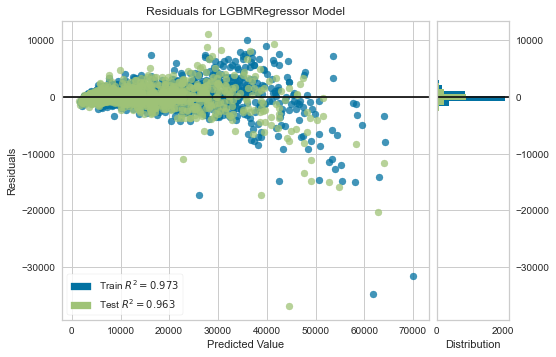

In [15]:
# residual plot
plot_model(tuned_lightgbm)

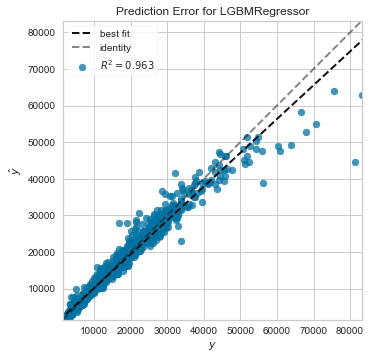

In [16]:
# prediction error plot
plot_model(tuned_lightgbm, plot='error')

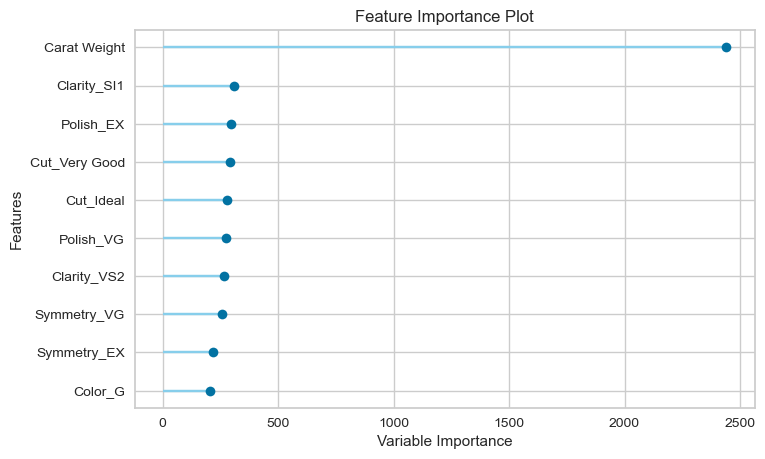

In [17]:
# feature importance plot
plot_model(tuned_lightgbm, plot = 'feature')

In [18]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
# predict on test sample
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,915.0194,4027394.9432,2006.8370,0.9633,0.1042,0.0736


In [20]:
# finalize model for deployement
final_lightgbm = finalize_model(tuned_lightgbm)

In [21]:
print(final_lightgbm)

LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [22]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,716.7220,2489145.4703,1577.7026,0.9773,0.0798,0.0574


In [23]:
unseen_prediction = predict_model(final_lightgbm,data= data_unseen)
unseen_prediction.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.21,Ideal,G,VVS1,EX,EX,GIA,11572,10668.640318
1,2.00,Ideal,I,SI1,EX,VG,GIA,16775,15603.481015
2,1.51,Good,F,SI1,VG,G,GIA,10429,10794.863911
3,0.90,Ideal,F,SI1,EX,EX,GIA,4523,4436.538102
4,1.01,Very Good,I,SI1,VG,VG,GIA,4375,4245.761540


In [25]:
# save the model
save_model(final_lightgbm,'Final Lightgbm Model 01-04-2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.4,
                                importance_type='split', learning_rate=0.1,
                                max_depth=-1, min_child_samples=41,
                    

In [26]:
# loading the saved model
saved_final_lightgbm = load_model('Final Lightgbm Model 01-04-2021')

Transformation Pipeline and Model Successfully Loaded


In [27]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)
new_prediction.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.21,Ideal,G,VVS1,EX,EX,GIA,11572,10668.640318
1,2.00,Ideal,I,SI1,EX,VG,GIA,16775,15603.481015
2,1.51,Good,F,SI1,VG,G,GIA,10429,10794.863911
3,0.90,Ideal,F,SI1,EX,EX,GIA,4523,4436.538102
4,1.01,Very Good,I,SI1,VG,VG,GIA,4375,4245.761540
